In [11]:
import pandas as pd

In [12]:
living_area_pd = pd.read_csv('../data/cleaned/combined_2009_2024.csv')

In [13]:
living_area_pd.head()

,zipcode,total_living_area,neighborhood,Year
0,2090,3609.0,Westwood,2009
1,2108,11175592.0,Back Bay/Beacon Hill,2009
2,2109,14088465.0,Central Boston,2009
3,2110,22990365.0,Central Boston,2009
4,2111,14762323.0,Central Boston,2009


In [14]:
living_area_pd['zipcode'] = living_area_pd['zipcode'].astype(str)
living_area_pd['zipcode'] = living_area_pd['zipcode'].str.zfill(5)
living_area_pd.head()


,zipcode,total_living_area,neighborhood,Year
0,02090,3609.0,Westwood,2009
1,02108,11175592.0,Back Bay/Beacon Hill,2009
2,02109,14088465.0,Central Boston,2009
3,02110,22990365.0,Central Boston,2009
4,02111,14762323.0,Central Boston,2009


In [15]:
living_area_pd.columns

Index(['zipcode', 'total_living_area', 'neighborhood', 'Year'], dtype='object')

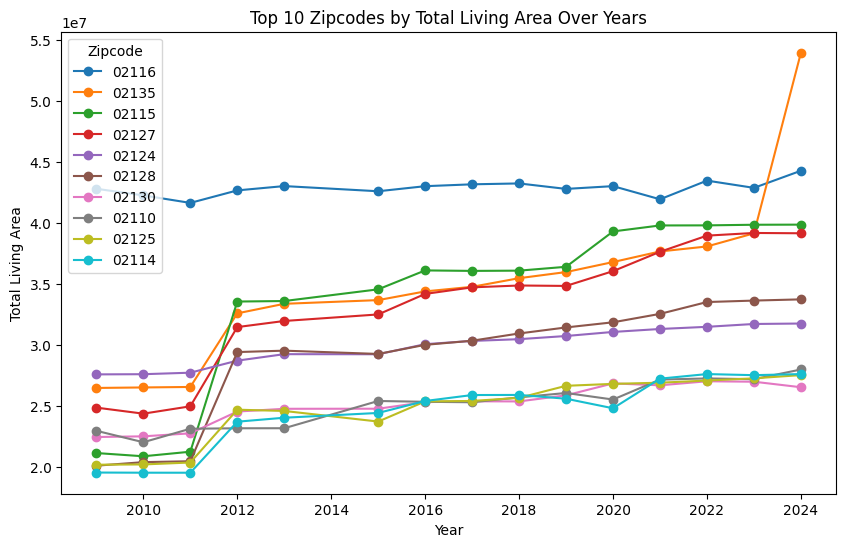

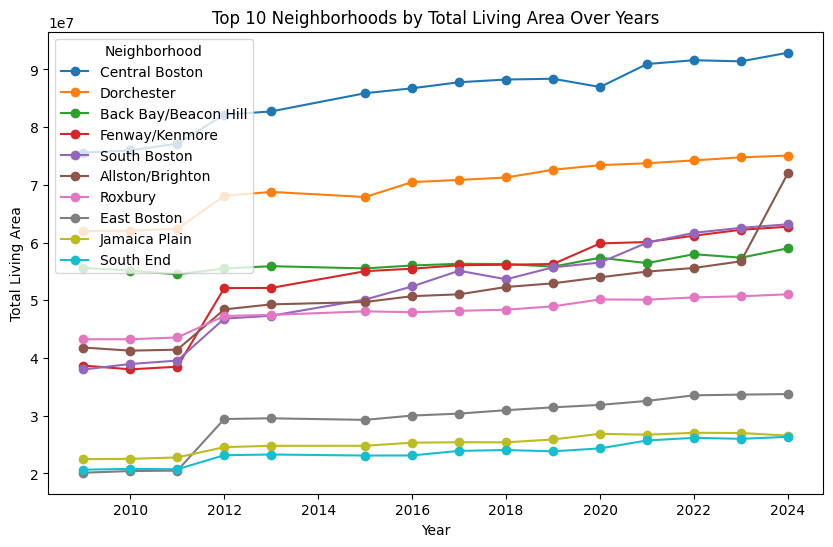

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

zipcode_grouped = living_area_pd.groupby(['Year', 'zipcode']).agg({'total_living_area': 'sum'}).reset_index()

top_zipcodes = zipcode_grouped.groupby('zipcode')['total_living_area'].sum().nlargest(10).index

plt.figure(figsize=(10, 6))
for zipcode in top_zipcodes:
    subset = zipcode_grouped[zipcode_grouped['zipcode'] == zipcode]
    plt.plot(subset['Year'], subset['total_living_area'], marker='o', linestyle='-', label=zipcode)

plt.title('Top 10 Zipcodes by Total Living Area Over Years')
plt.xlabel('Year')
plt.ylabel('Total Living Area')
plt.legend(title='Zipcode')
plt.show()

neighborhood_grouped = living_area_pd.groupby(['Year', 'neighborhood']).agg({'total_living_area': 'sum'}).reset_index()

top_neighborhoods = neighborhood_grouped.groupby('neighborhood')['total_living_area'].sum().nlargest(10).index

plt.figure(figsize=(10, 6))
for neighborhood in top_neighborhoods:
    subset = neighborhood_grouped[neighborhood_grouped['neighborhood'] == neighborhood]
    plt.plot(subset['Year'], subset['total_living_area'], marker='o', linestyle='-', label=neighborhood)

plt.title('Top 10 Neighborhoods by Total Living Area Over Years')
plt.xlabel('Year')
plt.ylabel('Total Living Area')
plt.legend(title='Neighborhood')
plt.show()


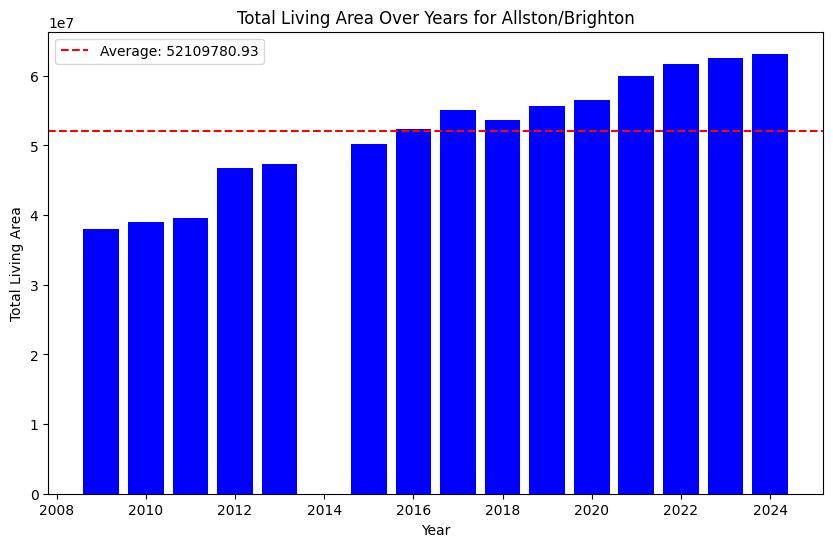

In [17]:
grouped = living_area_pd.groupby(['Year', 'neighborhood']).agg({'total_living_area': 'sum'}).reset_index()


top_data = grouped[grouped['neighborhood'] == 'South Boston']

plt.figure(figsize=(10, 6))
plt.bar(top_data['Year'], top_data['total_living_area'], color='blue')

average_area = top_data['total_living_area'].mean()
plt.axhline(y=average_area, color='red', linestyle='--', label=f'Average: {average_area:.2f}')

plt.title('Total Living Area Over Years for Allston/Brighton')
plt.xlabel('Year')
plt.ylabel('Total Living Area')
plt.legend()
plt.show()


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from PIL import Image
import os

grouped = living_area_pd.groupby(['Year', 'neighborhood']).agg({'total_living_area': 'sum'}).reset_index()

images = []

for year in sorted(grouped['Year'].unique()):
    yearly_data = grouped[grouped['Year'] == year].nlargest(10, 'total_living_area')

    fig, ax = plt.subplots()
    ax.pie(yearly_data['total_living_area'], labels=yearly_data['neighborhood'], autopct='%1.1f%%')
    ax.set_title(f'Total Living Area by Neighborhood in {year}')

    canvas = FigureCanvas(fig)
    ax.set_xlim(ax.get_xlim())
    canvas.draw()
    image = Image.frombytes('RGB', canvas.get_width_height(), canvas.tostring_rgb())
    images.append(image)
    plt.close(fig)

gif_path = '../data/gif/neighborhood_living_area.gif'
images[0].save(gif_path, save_all=True, append_images=images[1:], duration=500, loop=0)

print(f'GIF saved to {gif_path}')

C:\Users\73907\AppData\Local\Temp\ipykernel_61280\1933633601.py:21: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = Image.frombytes('RGB', canvas.get_width_height(), canvas.tostring_rgb())
C:\Users\73907\AppData\Local\Temp\ipykernel_61280\1933633601.py:21: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = Image.frombytes('RGB', canvas.get_width_height(), canvas.tostring_rgb())
C:\Users\73907\AppData\Local\Temp\ipykernel_61280\1933633601.py:21: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = Image.frombytes('RGB', canvas.get_width_height(), canvas.tostring_rgb())
C:\Users\73907\AppData\Local\Temp\ipykernel_61280\1933633601.py:21:

GIF saved to ../data/gif/neighborhood_living_area.gif


In [19]:
from IPython.display import display
from IPython.display import HTML
html = HTML(f'<img src="{gif_path}">')

display(html)

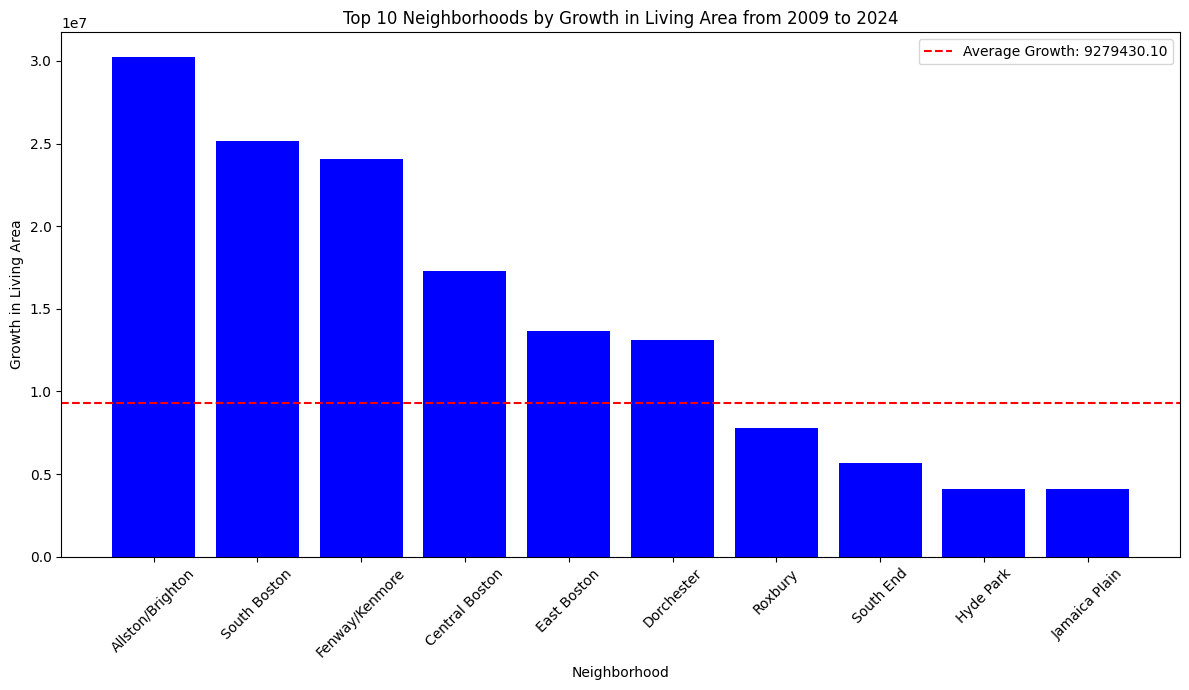

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

total_living_area_2009 = living_area_pd[living_area_pd['Year'] == 2009].groupby('neighborhood')['total_living_area'].sum()
total_living_area_2024 = living_area_pd[living_area_pd['Year'] == 2024].groupby('neighborhood')['total_living_area'].sum()

growth = total_living_area_2024 - total_living_area_2009

top10_growth = growth.nlargest(10).reset_index()

average_growth = growth.mean()

plt.figure(figsize=(12, 7))
bars = plt.bar(top10_growth['neighborhood'], top10_growth['total_living_area'], color='blue')

plt.axhline(y=average_growth, color='red', linestyle='--', label=f'Average Growth: {average_growth:.2f}')

plt.xlabel('Neighborhood')
plt.ylabel('Growth in Living Area')
plt.title('Top 10 Neighborhoods by Growth in Living Area from 2009 to 2024')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()